### Dataset Link
https://www.kaggle.com/code/usmanayaz/petrol-gas-prices-worldwide-eda/data

Dataset Label : June 23, 2022 version 2

In [15]:
# loading the necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import autoviz.AutoViz_Class
import klib
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kstest 

### Loading data

In [16]:
# loading the csv file into a pandas dataframe format 
df = pd.read_csv("/DataScienceProjects/petrolData.csv",index_col=1,encoding='latin-1')
df["Country"] = df.index
df = df.set_index("S#")

In [17]:
# checking the top 5 rows of the dataset
df.head()

,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy,Country
S#,,,,,,,,,,
1,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13,United States
2,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14,China
3,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7,India
4,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18,Japan
5,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8,Russia


### Exploratory Data Analysis on Petrol/Gas Dataset

Now we will dig deep into the insights of the dataset by cleaning, visualizing, and building some analysis through them.

In [18]:
# check total countries and their columns
print(f"There are {len(df)} countries and {len(df.columns)} columns of each.") 
#print("There are ",len(df),"countries and ", len(df.columns),"columns of each.")

There are 181 countries and 10 columns of each.


In [19]:
# dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 181
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Daily Oil Consumption (Barrels)       181 non-null    object 
 1   World Share                           181 non-null    object 
 2   Yearly Gallons Per Capita             181 non-null    float64
 3   Price Per Gallon (USD)                181 non-null    float64
 4   Price Per Liter (USD)                 181 non-null    float64
 5   Price Per Liter (PKR)                 181 non-null    float64
 6   GDP Per Capita ( USD )                181 non-null    object 
 7   Gallons GDP Per Capita Can Buy        181 non-null    object 
 8   xTimes Yearly Gallons Per Capita Buy  181 non-null    int64  
 9   Country                               181 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 15.6+ KB


In [20]:
# here we will see the mean, dispersion and overall shape of the dataset.
df.describe()

,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),xTimes Yearly Gallons Per Capita Buy
count,181.000000,181.000000,181.000000,181.000000,181.000000
mean,332.006630,5.695691,1.505138,318.219227,14.204420
std,436.558735,4.370484,1.154575,244.192081,48.613866
min,2.200000,0.080000,0.020000,4.650000,1.000000
25%,53.900000,4.150000,1.100000,232.020000,6.000000
50%,180.200000,5.280000,1.400000,295.040000,9.000000
75%,424.600000,6.760000,1.790000,377.740000,12.000000
max,3679.500000,54.890000,14.500000,3066.750000,654.000000


### Data Cleaning

Data cleaning include removing duplicates, handling missing values, removing outliers, adjusting the data types, removing
irrelvant features/information, and validation.

In [21]:
# visualizing the missing values in the numerical features of the dataset, if there is any
klib.missingval_plot(df)

No missing values found in the dataset.


In [22]:
# summarize the type and overall picture of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 181
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Daily Oil Consumption (Barrels)       181 non-null    object 
 1   World Share                           181 non-null    object 
 2   Yearly Gallons Per Capita             181 non-null    float64
 3   Price Per Gallon (USD)                181 non-null    float64
 4   Price Per Liter (USD)                 181 non-null    float64
 5   Price Per Liter (PKR)                 181 non-null    float64
 6   GDP Per Capita ( USD )                181 non-null    object 
 7   Gallons GDP Per Capita Can Buy        181 non-null    object 
 8   xTimes Yearly Gallons Per Capita Buy  181 non-null    int64  
 9   Country                               181 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 15.6+ KB


In [23]:
# will drop the duplicates, empty rows/cols, and adjust dtypes ...
df_cleaned = klib.data_cleaning(df)

Long column names detected (>25 characters). Consider renaming the following columns ['daily_oil_consumption_barrels', 'gallons_gdp_per_capita_can_buy', 'x_times_yearly_gallons_per_capita_buy'].
Shape of cleaned data: (181, 10)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.01 MB (-50.0%)



In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   daily_oil_consumption_barrels          181 non-null    string 
 1   world_share                            181 non-null    string 
 2   yearly_gallons_per_capita              181 non-null    Float32
 3   price_per_gallon_usd                   181 non-null    Float32
 4   price_per_liter_usd                    181 non-null    Float32
 5   price_per_liter_pkr                    181 non-null    Float32
 6   gdp_per_capita_usd                     181 non-null    string 
 7   gallons_gdp_per_capita_can_buy         181 non-null    string 
 8   x_times_yearly_gallons_per_capita_buy  181 non-null    int16  
 9   country                                181 non-null    string 
dtypes: Float32(4), int16(1), string(5)
memory usage: 11.1 KB


* Data contains no missing values, duplicates rows, and cols.
* Some features of the dataset was assigned inappropriate dataset,
* but after cleaning through "Klib" appropriate ones are assigned to them.
* Also, it doesn't contain NAN value in any numerical feature.

As some of the features of the dataset contains strings dtype() which is logically wrong
Which should've been assigned an integer type, also strings in these features contains commas in them. 
So, we need to remove those commas before converting them to numerical type 


In [25]:
# Not taking all the columns of strings type, just those which are wrongly assigned
# removing commas and setting up the integer type for them
for col in df_cleaned.columns[[0,6,7]]:
    df_cleaned[col] = [val.replace(",","") for val in df_cleaned[col]]
    df_cleaned[col] = df_cleaned[col].astype(np.int64)

In [26]:
df_cleaned["world_share"] = [val.replace("%","") for val in df_cleaned["world_share"]]
df_cleaned["world_share"] = df_cleaned["world_share"].astype(np.int64)

In [27]:
# check the updated dtype of the features
df_cleaned.rename(columns={"world_share":"world_share(%)"},inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   daily_oil_consumption_barrels          181 non-null    int64  
 1   world_share(%)                         181 non-null    int64  
 2   yearly_gallons_per_capita              181 non-null    Float32
 3   price_per_gallon_usd                   181 non-null    Float32
 4   price_per_liter_usd                    181 non-null    Float32
 5   price_per_liter_pkr                    181 non-null    Float32
 6   gdp_per_capita_usd                     181 non-null    int64  
 7   gallons_gdp_per_capita_can_buy         181 non-null    int64  
 8   x_times_yearly_gallons_per_capita_buy  181 non-null    int16  
 9   country                                181 non-null    string 
dtypes: Float32(4), int16(1), int64(4), string(1)
memory usage: 11.1 KB


In [28]:
# Now set the Country column as the row index
df_cleaned =  df_cleaned.set_index("country")

In [29]:
df_cleaned.head()

,daily_oil_consumption_barrels,world_share(%),yearly_gallons_per_capita,price_per_gallon_usd,price_per_liter_usd,price_per_liter_pkr,gdp_per_capita_usd,gallons_gdp_per_capita_can_buy,x_times_yearly_gallons_per_capita_buy
country,,,,,,,,,
United States,19687287,20,934.299988,5.19,1.37,289.970001,63414,12218,13
China,12791553,13,138.699997,5.42,1.43,302.869995,10435,1925,14
India,4443000,5,51.400002,5.05,1.33,281.929993,1901,376,7
Japan,4012877,4,481.5,4.69,1.24,262.049988,40193,8570,18
Russia,3631287,4,383.200012,3.41,0.9,190.559998,10127,2970,8


### Univariate Analysis

Check whether the features follow the normal distribution or not.

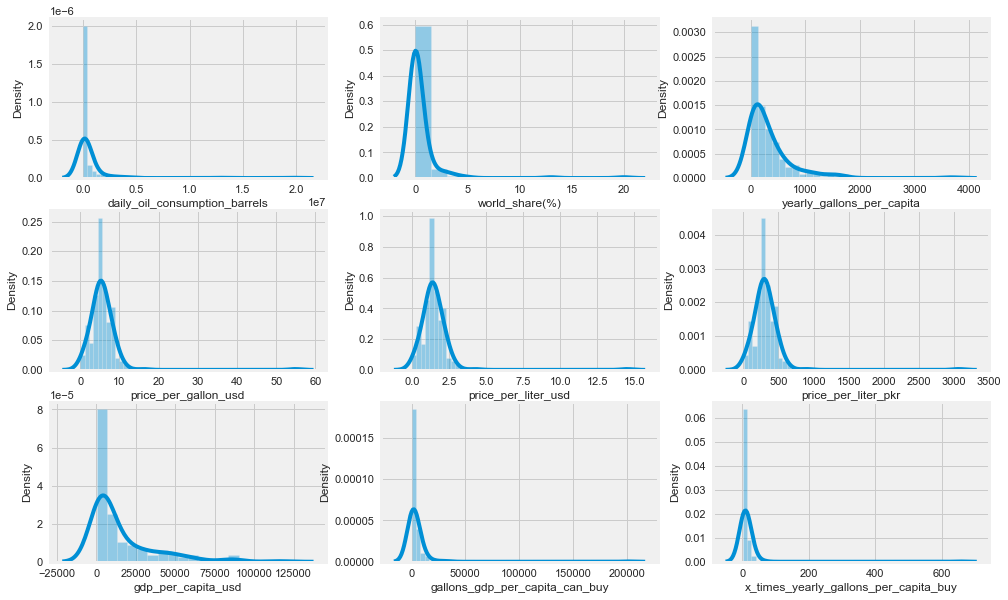

In [35]:
%matplotlib inline
# total 9 numerical columns
# distribution plot of all columns to check the normal distribution curve, if they're following
# creating a 3x3 matrix of distplot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i, col in enumerate(df_cleaned.columns):
    sns.distplot(df_cleaned[col],ax=axes[i//3,i%3])